<a href="https://colab.research.google.com/github/manu-eldho/artificial_intelligence/blob/main/student_score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/StudentPerformanceFactors.csv')

print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [ ]:
df = df.drop_duplicates()
print("Missing values per column:\n", df.isnull().sum())
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values per column:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
Missing values after cleaning:
 Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Ac

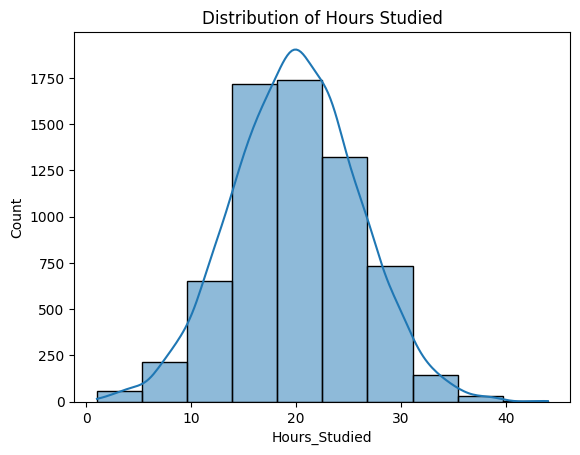

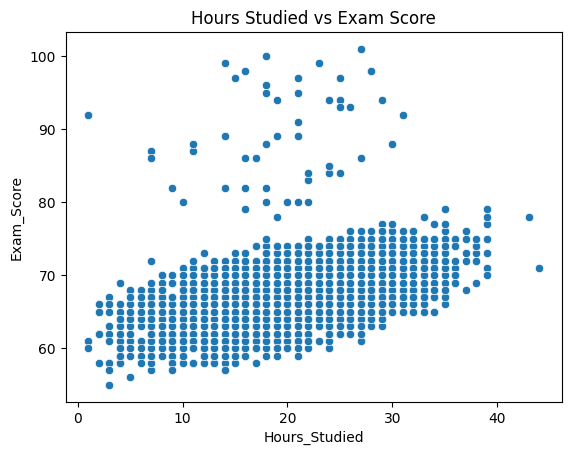

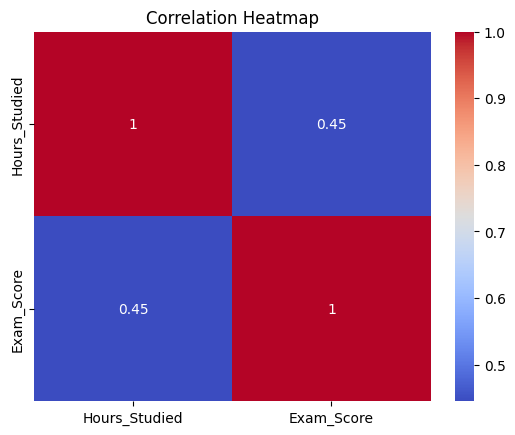

In [ ]:
# Distribution of Hours_Studied
sns.histplot(df['Hours_Studied'], bins=10, kde=True)
plt.title("Distribution of Hours Studied")
plt.show()

# Relationship between Hours_Studied and Exam_Score
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title("Hours Studied vs Exam Score")
plt.show()

# Correlation heatmap (only numeric)
corr = df[['Hours_Studied', 'Exam_Score']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Hours_Studied']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Model Coefficient: {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")


Mean Squared Error: 10.86
R² Score: 0.23
Model Coefficient: 0.29
Model Intercept: 61.51


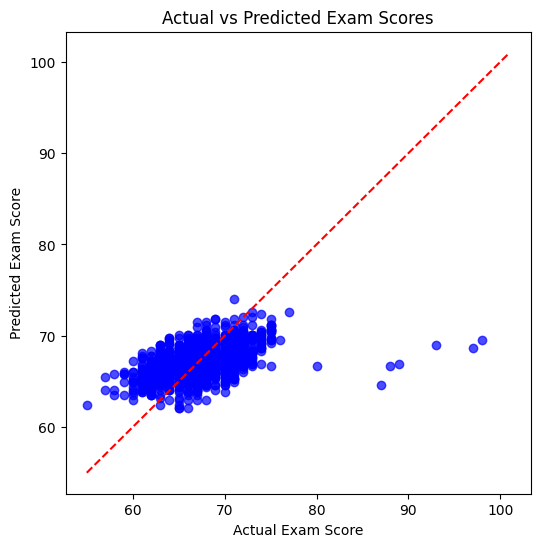

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.show()


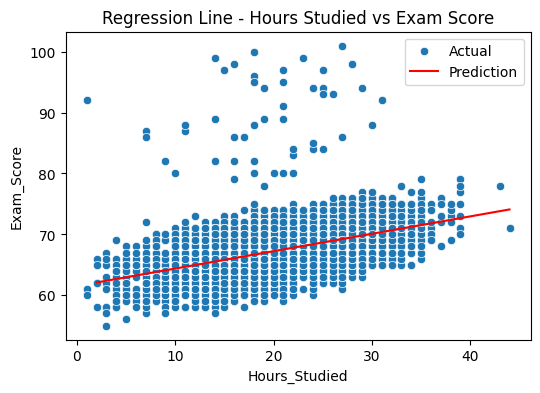

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df, label="Actual")
sns.lineplot(x=X_test['Hours_Studied'], y=y_pred, color='red', label="Prediction")
plt.title("Regression Line - Hours Studied vs Exam Score")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Model Performance:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")


📊 Model Performance:
MAE  : 2.45
MSE  : 10.86
RMSE : 3.29
R²   : 0.23


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Transform features to polynomial (degree=2 for a start)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Fit model
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Predict on test set
y_pred_poly = poly_model.predict(poly.transform(X_test))


In [ ]:
# Linear Regression Metrics
mae_lin = mean_absolute_error(y_test, y_pred)
mse_lin = mean_squared_error(y_test, y_pred)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred)

# Polynomial Regression Metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Performance Comparison")
print(f"{'Model':<20}{'MAE':<10}{'MSE':<10}{'RMSE':<10}{'R²':<10}")
print(f"{'Linear Regression':<20}{mae_lin:<10.2f}{mse_lin:<10.2f}{rmse_lin:<10.2f}{r2_lin:<10.2f}")
print(f"{'Polynomial (deg=2)':<20}{mae_poly:<10.2f}{mse_poly:<10.2f}{rmse_poly:<10.2f}{r2_poly:<10.2f}")


Performance Comparison
Model               MAE       MSE       RMSE      R²        
Linear Regression   2.45      10.86     3.29      0.23      
Polynomial (deg=2)  2.44      10.84     3.29      0.23      


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


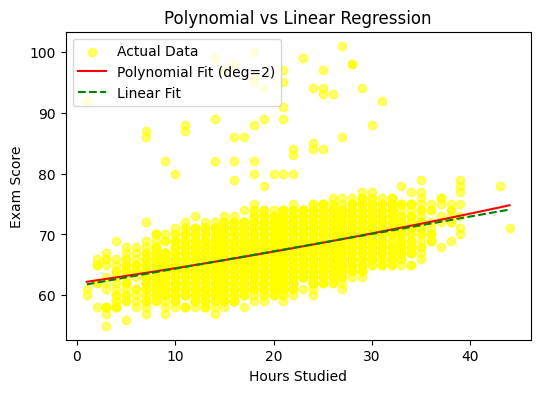

In [ ]:
plt.figure(figsize=(6,4))
# Scatter actual data
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='yellow', alpha=0.6, label="Actual Data")

# Generate smooth curve for polynomial regression
X_curve = np.linspace(df['Hours_Studied'].min(), df['Hours_Studied'].max(), 100).reshape(-1,1)
y_curve = poly_model.predict(poly.transform(X_curve))
plt.plot(X_curve, y_curve, color='red', label="Polynomial Fit (deg=2)")

# Linear fit for comparison
y_line = model.predict(X_curve)
plt.plot(X_curve, y_line, color='green', linestyle='--', label="Linear Fit")

plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Polynomial vs Linear Regression")
plt.legend()
plt.show()
